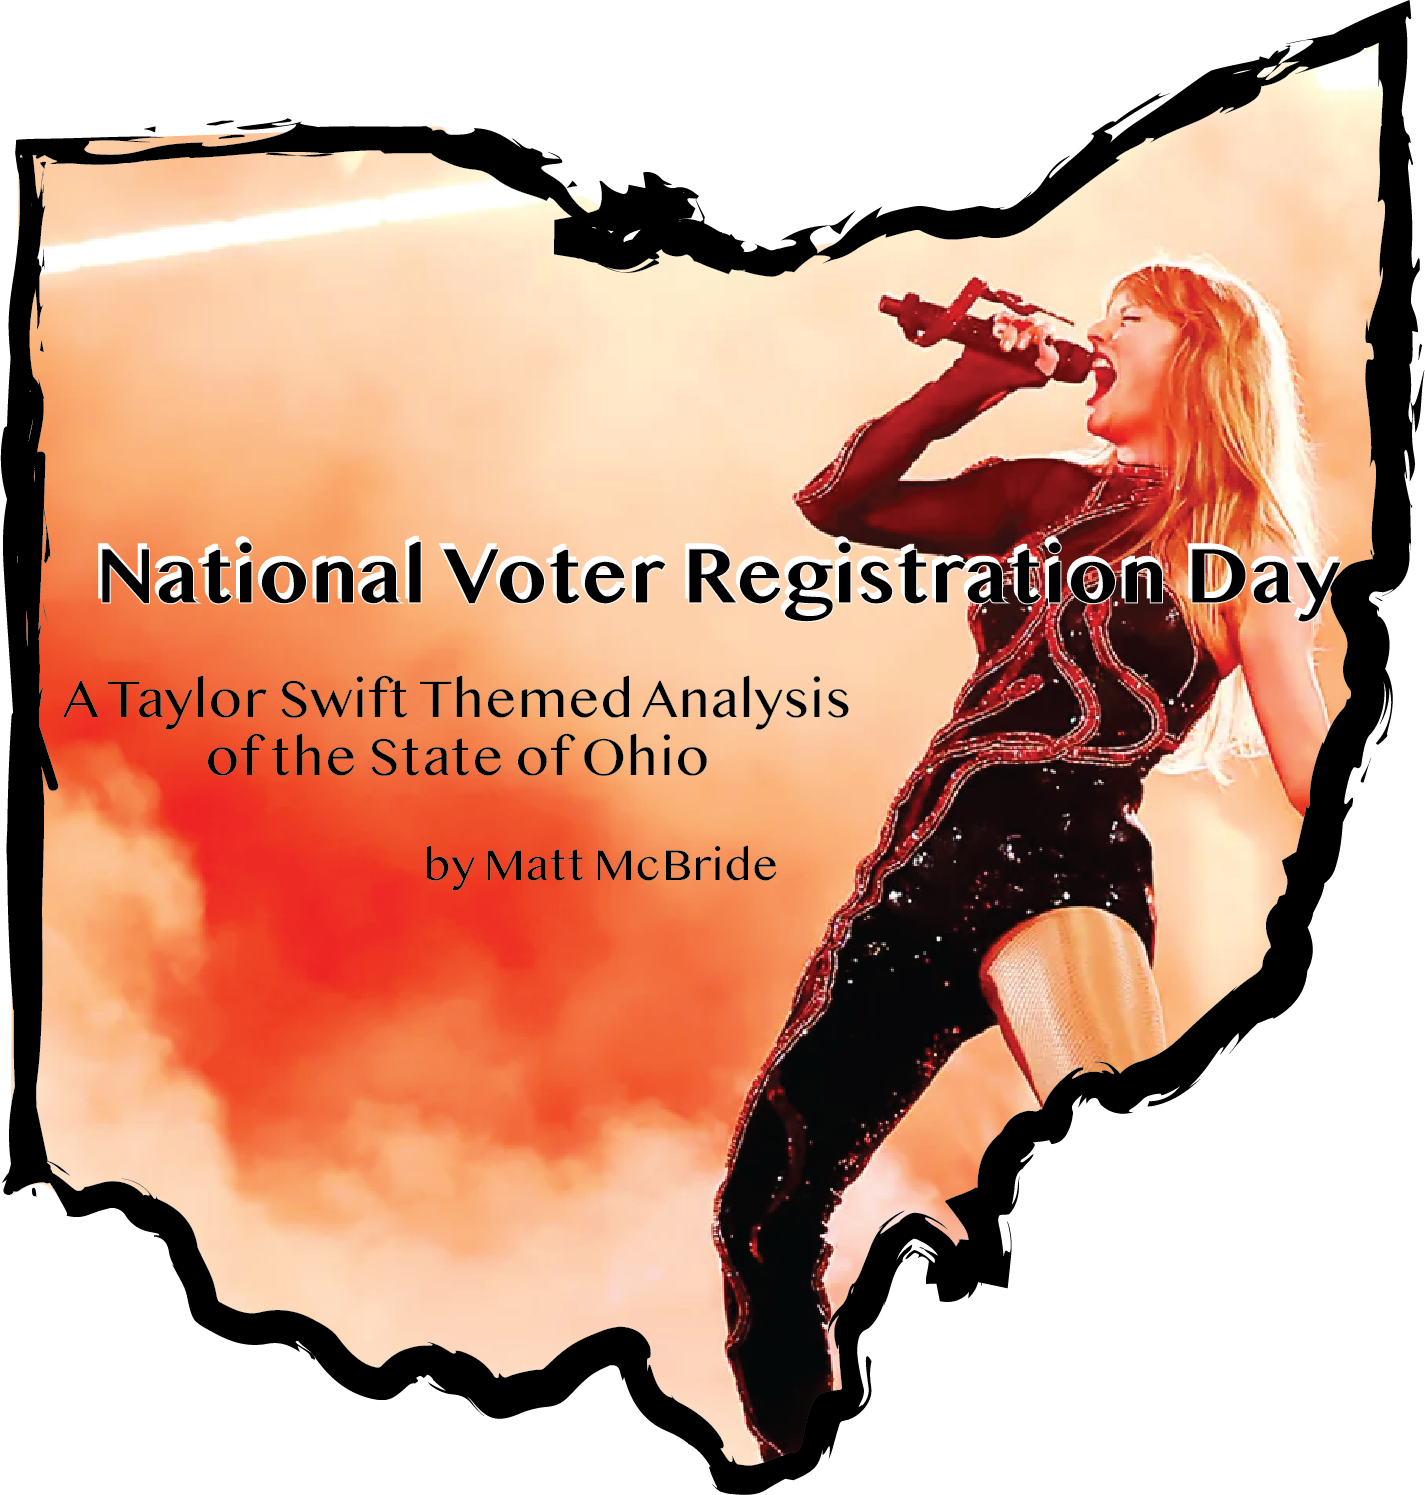


# 'End Game' (An Explanation)


A Data Analyst job with Protect Democracy would be a dream job for me. Utilizing Python coding skills to examine voter and election data to ensure free and fair elections is exactly what I want to do with my career. This  analysis displays my strong Python skillset, ability to understand and dynamically import voter data, and my creative sense of humor. When a dream opportunity presents itself, sometimes you have to pull a Travis Kelcey and: "shoot your shot." 

# 'September' (An Introduction)

On September 19, 2023, Taylor Swift made an Instagram post to her 272 million followers, encouraging them to register to vote as it was National Voter Registration Day (NVRD). She included a link to vote.org, the nation's largest voter registration platform. One hour after Swift's post, Vote.Org reported a 1,226% surge in participation[^1].

While the true impact of Taylor Swift's post cannot be precisely measured, I pondered how the National Voter Registration Day totals in a potential swing state like Ohio compared to other years. How did NVRD totals compare to previous years? How did it compare to other years preceding a presidential election?

Unfortunately, one of the most intriguing questions could not be answered. The analysis of Political Party Affiliation among newly registered Voters cannot be calculated for this year, as Ohio election law stipulates: "For purposes of Ohio election law, an individual affiliates with a political party by voting in that party’s primary election. An individual does not register a political party preference when they register to vote."[^2]

Fortunately, Ohio provides open and free access to voter registration data. This is not always the case in states like Alabama, which charge $37,000 for voter records[^3]. This openness allows the public to audit and ensure free and fair elections.

Below is Python code that: 
* dynamically imports data from the Ohio Secretary of States Office website
* cleans the data to allow for analysis
* provides an analysis of this year's NVRD compared to previous
* visualizes the data for easy comprehension

[1]: Source: NPR - "Taylor Swift Encourages Voter Registration on Instagram on National Voter Registration Day." Available at: https://www.npr.org/2023/09/22/1201183160/taylor-swift-instagram-voter-registration

[2]: Source: Ohio Secretary of State - Directive 2022-19-CH15, available at: https://www.ohiosos.gov/globalassets/elections/directives/2022/eom/dir2022-19-ch15.pdf

[3]: Source: U.S. Election Assistance Commission - "Available Voter File Information." Available at: https://www.eac.gov/sites/default/files/voters/Available_Voter_File_Information.pdf

# Import Necessary Packages

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service as ChromeService
import time
import shutil
import numpy as np


# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set Graph Styles
plt.style.use('ggplot')

# Import Data

This step empties the 'Ohio Voter Data' folder to ensure files update each time the code is run. This will allow for future analysis and ensure the data is up to date.

In [2]:
#Folder Location
folder_path = '/Users/mattmcbride/Documents/Ohio Voter Data'

try:
    # List all files in the folder
    files = os.listdir(folder_path)

    # Iterate through the files and delete them
    for file in files:
        file_path = os.path.join(folder_path, file)
        
        # Check if the path is a file (not a directory)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")
    
    print("All files in the folder have been deleted.")

except Exception as e:
    print(f"An error occurred: {e}")

All files in the folder have been deleted.


This code dynamically retrieves data from the Ohio Secretary of State's office and saves it to the 'Ohio Voter Data' folder. It then converts the .txt files into dataframes for each county and ultimately combines them into a single dataframe. The resulting dataframe contains voter registration data for the entire state of Ohio.

In [3]:
ohio_counties = [
    "ADAMS", "ALLEN", "ASHLAND", "ASHTABULA", "ATHENS", 
    "AUGLAIZE", "BELMONT", "BROWN", "BUTLER", "CARROLL", 
    "CHAMPAIGN", "CLARK", "CLERMONT", "CLINTON", "COLUMBIANA", 
    "COSHOCTON", "CRAWFORD", "CUYAHOGA", "DARKE", "DEFIANCE",
    "DELAWARE", "ERIE", "FAIRFIELD", "FAYETTE", "FRANKLIN",
    "FULTON", "GALLIA", "GEAUGA", "GREENE", "GUERNSEY",
    "HAMILTON", "HANCOCK", "HARDIN", "HARRISON", "HENRY",
    "HIGHLAND", "HOCKING", "HOLMES", "HURON", "JACKSON",
    "JEFFERSON", "KNOX", "LAKE", "LAWRENCE", "LICKING",
    "LOGAN", "LORAIN", "LUCAS",  "MADISON",  "MAHONING",
    "MARION", "MEDINA", "MEIGS", "MERCER", "MIAMI", 
    "MONROE", "MONTGOMERY", "MORGAN", "MORROW", "MUSKINGUM",
    "NOBLE", "OTTAWA", "PAULDING", "PERRY", "PICKAWAY",
    "PIKE", "PORTAGE", "PREBLE", "PUTNAM", "RICHLAND",
    "ROSS", "SANDUSKY", "SCIOTO", "SENECA", "SHELBY",
    "STARK", "SUMMIT", "TRUMBULL",  "TUSCARAWAS", "UNION",
    "VANWERT", "VINTON", "WARREN", "WASHINGTON", "WAYNE",
    "WILLIAMS", "WOOD", "WYANDOT"
]


# Path to the Chrome WebDriver
webdriver_path = '/Users/mattmcbride/Documents/chromedriver-mac-x64/chromedriver'

# Chrome WebDriver Instance
driver = webdriver.Chrome(service=ChromeService(executable_path=webdriver_path))

# Open the Website
driver.get('https://www6.ohiosos.gov/ords/f?p=VOTERFTP:HOME::::::')

try:
    # Iterate through the list of Ohio counties and click on each one to download files 
    for county in ohio_counties:
        county_element = driver.find_element(By.PARTIAL_LINK_TEXT, county)
        county_element.click()
        
        # Sleep to give time for file to download before moving file
        time.sleep(30)

        # Specify the source and destination paths
        source_path = '/Users/mattmcbride/Downloads'  
        destination_path = '/Users/mattmcbride/Documents/Ohio Voter Data'

        # List the files in the downloads folder
        files = os.listdir(source_path)

        # Move files named "COUNTY.txt" to the destination folder
        for file in files:
            if file == f"{county}.txt":
                source_file = os.path.join(source_path, file)
                destination_file = os.path.join(destination_path, file)
                shutil.move(source_file, destination_file)

except Exception as e:
    print(f"An error occurred: {e}")
    
finally:
    driver.quit()

folder_path = '/Users/mattmcbride/Documents/Ohio Voter Data/'

dataframes = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, delimiter=',', quotechar='"', encoding='latin-1', low_memory=False)
    dataframes.append(df)
    
df = pd.concat(dataframes, ignore_index=True)

# Clean Data

In [4]:
# Delete records that are NaN for each value (~37 total)
df.dropna(subset=['SOS_VOTERID'], inplace=True)

# Turn to Date Time Object
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])

# Define Today
today = dt.date.today()

# Age Column
df['Age'] = today - df['DATE_OF_BIRTH'].dt.date
df['Age'] = (df['Age'].dt.days // 365).astype(int)

# New Column with Registration Year, Month, Day
df['Reg Year'] = df['REGISTRATION_DATE'].dt.year  # Cast to integer
df['Reg Month'] = df['REGISTRATION_DATE'].dt.month  # Cast to integer
df['Reg Day'] = df['REGISTRATION_DATE'].dt.day  # Cast to integer

# Create Columns of to get Age on Registration Date and M-D formatted Registration Day
df['Month/Day'] = df['REGISTRATION_DATE'].dt.strftime('%m-%d')
df['Age On Voter Reg Day'] = df['REGISTRATION_DATE'] - df['DATE_OF_BIRTH']
df['Age On Voter Reg Day'] = df['Age On Voter Reg Day'].dt.days // 365

# Reformat Values
df['PARTY_AFFILIATION'].fillna('Independent', inplace=True)
df['PARTY_AFFILIATION'] = df['PARTY_AFFILIATION'].replace('R', 'Republican')
df['PARTY_AFFILIATION'] = df['PARTY_AFFILIATION'].replace('D', 'Democrat')
df['PARTY_AFFILIATION'] = df['PARTY_AFFILIATION'].replace('L', 'Libertarian')
df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,GENERAL-11/03/2020,PRIMARY-05/04/2021,PRIMARY-08/03/2021,PRIMARY-09/14/2021,GENERAL-11/02/2021,PRIMARY-05/03/2022,PRIMARY-08/02/2022,GENERAL-11/08/2022,SPECIAL-02/28/2023,PRIMARY-05/02/2023,SPECIAL-08/08/2023,SPECIAL-09/12/2023,Unnamed: 0,Age,Reg Year,Reg Month,Reg Day,Month/Day,Age On Voter Reg Day
0,OH0015738531,78.0,281598.0,TOTH,KELLY,R,NaN,1980-02-17,2013-04-12,ACTIVE,Democrat,349 GREENBRIAR DR,NaN,CORTLAND,OH,44410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUMBULL CAREER & TECH CENTER,CORTLAND CITY,NaN,NaN,14.0,11.0,TRUMBULL COUNTY ESC,NaN,NaN,LAKEVIEW LOCAL SD (TRUMBULL),NaN,CORTLAND CITY D,78-P-AKT,9.0,65.0,32.0,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,D,NaN,NaN,NaN,NaN,X,NaN,NaN,43,2013,4,12,04-12,33
1,OH0015717049,78.0,282533.0,STANFORD,TIFFANY,N,NaN,1980-01-06,2022-09-23,ACTIVE,Democrat,1561 FRANCIS AVE SE,NaN,WARREN,OH,44484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUMBULL CAREER & TECH CENTER,WARREN CITY,WARREN CITY SD,NaN,14.0,11.0,NaN,NaN,NaN,NaN,WARREN,WARREN CITY 5G,78-P-ADW,9.0,64.0,32.0,NaN,NaN,WARREN-WARD 5,NaN,X,NaN,NaN,NaN,X,X,X,X,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,D,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,D,NaN,X,NaN,X,NaN,NaN,NaN,NaN,D,X,NaN,NaN,X,D,NaN,NaN,X,D,NaN,X,D,NaN,X,D,NaN,X,D,X,D,NaN,NaN,X,NaN,D,X,NaN,D,NaN,NaN,NaN,43,2022,9,23,09-23,42
2,OH0018715221,78.0,343159.0,HALL,MARY,L,NaN,1954-03-10,2020-08-01,ACTIVE,Democrat,619 ADELAIDE AVE SE,NaN,WARREN,OH,44483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUMBULL CAREER & TECH CENTER,WARREN CITY,WARREN CITY SD,NaN,14.0,11.0,NaN,NaN,NaN,NaN,WARREN,WARREN CITY 5G,78-P-ADW,9.0,64.0,32.0,NaN,NaN,WARREN-WARD 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN

# Analysis

## Totals

### Total Ohio Voter NVRD Registrations by Year

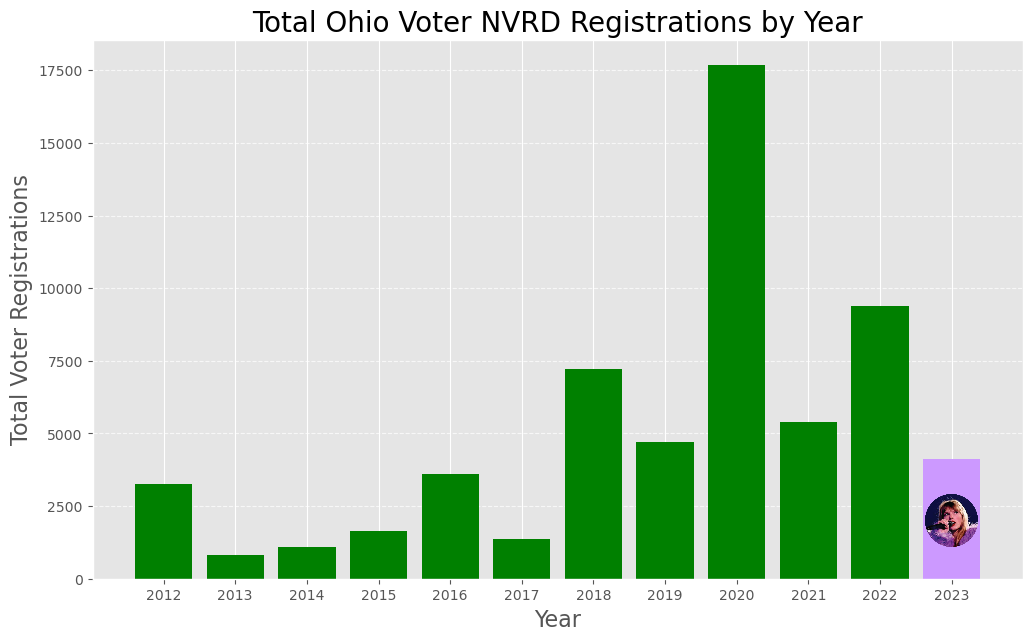

In [5]:
# Define National Voter Registration Days (NVRD) (values)
voter_reg_dates = ['2023-09-19','2022-09-20','2021-09-28','2020-09-22','2019-09-24','2018-09-25',
                  '2017-09-26','2016-09-27','2015-09-22','2014-09-23','2013-09-24','2012-09-25']

# Create a filtered df for only NVRD dates
nvrd_df = df[df['REGISTRATION_DATE'].isin(voter_reg_dates)]
# Get total registrations by year on NVRD
total_nvrd_by_year = nvrd_df.groupby(['Reg Year'])['COUNTY_NUMBER'].size().reset_index(name='Voters Registered')

# Adjust Plots
fig, ax = plt.subplots(figsize=(12, 7))  # Create a figure and axis object

# Set the color for the bars in 2023 to LAVENDER HAZE and others to green
colors = ['#CC99FF' if year == 2023 else 'green' for year in total_nvrd_by_year['Reg Year']]

# Create Bar Plot
bars = plt.bar(total_nvrd_by_year['Reg Year'], total_nvrd_by_year['Voters Registered'], color=colors)

# Load and display the photo (replace 'your_image.png' with the path to your image file)
image_path = '/Users/mattmcbride/Desktop/T_Swiz_LH.png'
img = plt.imread(image_path)

# Center the photo within the lavender bar
for i, bar in enumerate(bars):
    if total_nvrd_by_year['Reg Year'][i] == 2023:
        imagebox = OffsetImage(img, zoom=0.15)
        ab = AnnotationBbox(imagebox, (2023, 2000), frameon=False, pad=0)
        ax.add_artist(ab)  # Add the image annotation to the axis 'ax'

# Format
plt.title('Total Ohio Voter NVRD Registrations by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Voter Registrations', fontsize=16)
plt.xticks(total_nvrd_by_year['Reg Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()


### Total Ohio Voter NVRD Registrations for Years Preceeding a Presidential Election

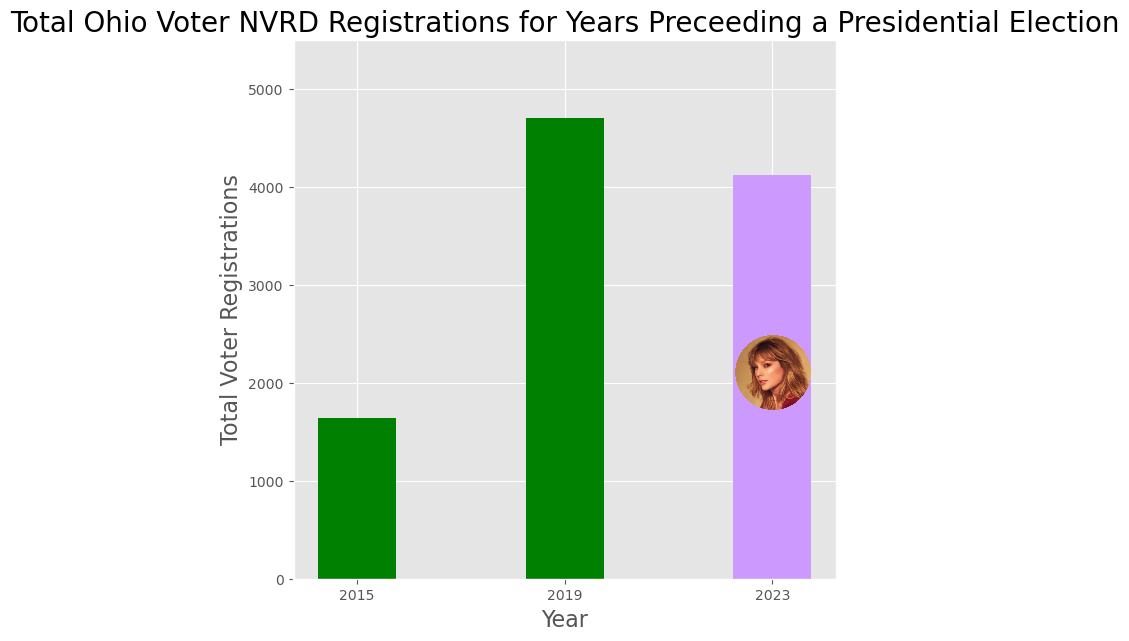

In [6]:
# Define NVRD for years before presidential election values
voter_reg_dates = ['2023-09-19','2019-09-24','2015-09-22']

# Create a filtered df for only NVRD dates
nvrd_df = df[df['REGISTRATION_DATE'].isin(voter_reg_dates)]
# Get total registrations by year on NVRD
total_nvrd_by_year = nvrd_df.groupby(['Reg Year'])['COUNTY_NUMBER'].size().reset_index(name='Voters Registered')

# Adjust Plots
fig, ax = plt.subplots(figsize=(7, 7))  # Create a figure and axis object

# Set the color for the bars in 2023 to LAVENDER HAZE and others to green
colors = ['#CC99FF' if year == 2023 else 'green' for year in total_nvrd_by_year['Reg Year']]

# Create Bar Plot
bars = plt.bar(total_nvrd_by_year['Reg Year'], total_nvrd_by_year['Voters Registered'], color=colors, width = 1.5)

# Load and display the photo (replace 'your_image.png' with the path to your image file)
image_path = '/Users/mattmcbride/Desktop/T_Swiz 2.png'
img = plt.imread(image_path)

# Center the photo within the lavender bar
for i, bar in enumerate(bars):
    if total_nvrd_by_year['Reg Year'][i] == 2023:
        imagebox = OffsetImage(img, zoom=0.18)
        ab = AnnotationBbox(imagebox, (2023, 2100), frameon=False, pad=0)
        ax.add_artist(ab)  # Add the image annotation to the axis 'ax'

# Format
plt.title('Total Ohio Voter NVRD Registrations for Years Preceeding a Presidential Election', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Voter Registrations', fontsize=16)
plt.xticks(total_nvrd_by_year['Reg Year'])
plt.ylim(0, 5500)


plt.show()

## Breakdown by Age

### Total Ohio Voter NVRD Registrations by Age Group by Year

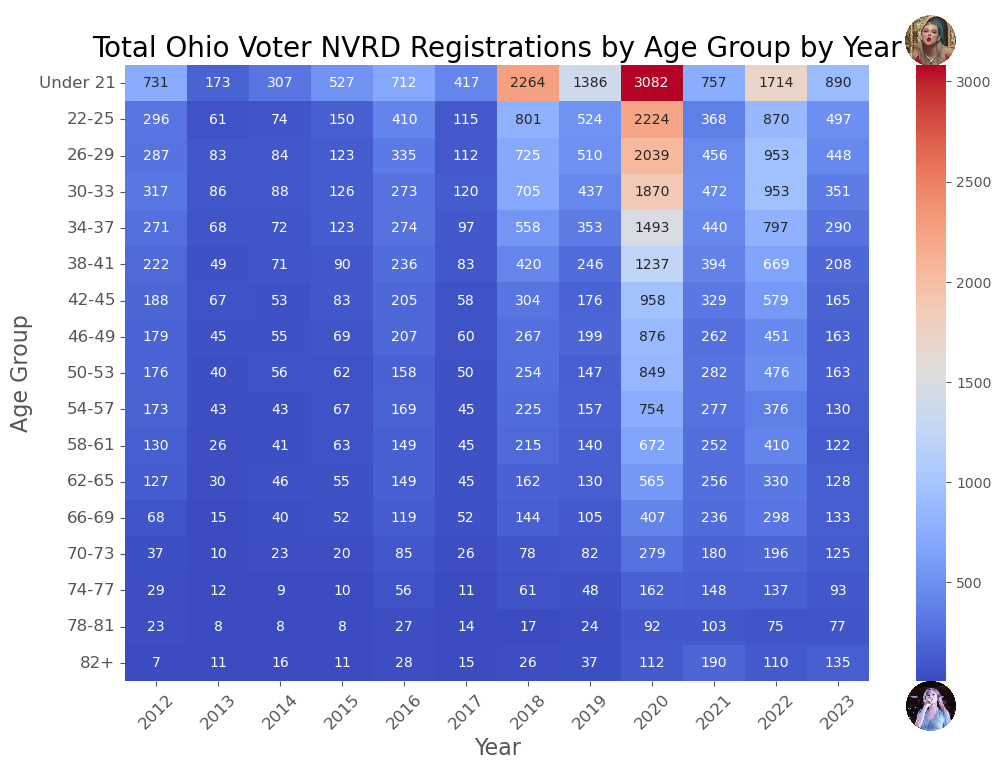

In [7]:
# Define age bins 
age_bins = [0, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 115]  

# Define labels for the bins
labels = ['Under 21', '22-25', '26-29', '30-33', '34-37', '38-41', '42-45', '46-49', '50-53', '54-57', '58-61',
          '62-65', '66-69', '70-73', '74-77', '78-81', '82+']

# Create new column and apply the cut function with the updated age bins and labels
df['Age On Voter Reg Day Bin'] = pd.cut(df['Age On Voter Reg Day'], bins=age_bins, labels=labels, right=False)

# Define NVRD values
voter_reg_dates = ['2023-09-19','2022-09-20','2021-09-28','2020-09-22','2019-09-24','2018-09-25',
                  '2017-09-26','2016-09-27','2015-09-22','2014-09-23','2013-09-24','2012-09-25']

# Create a filtered df for only NVRD dates
nvrd_df = df[df['REGISTRATION_DATE'].isin(voter_reg_dates)]

# Get total registrations by year by Age bin on NVRD
total_nvrd_by_age_by_year = nvrd_df.groupby(['Reg Year', 'Age On Voter Reg Day Bin'])['COUNTY_NUMBER'].size().reset_index(name='Voters Registered')


# Create Pivot table
pivot_df = total_nvrd_by_age_by_year.pivot(index='Age On Voter Reg Day Bin', columns='Reg Year', values='Voters Registered')

# Load your images
image_top = plt.imread('/Users/mattmcbride/Desktop/T_Swiz 5.png')  # Replace 'path_to_image_top.png' with the actual path to your image
image_bottom = plt.imread('/Users/mattmcbride/Desktop/T_Swiz 4.png')  # Replace 'path_to_image_bottom.png' with the actual path to your image

# Create a figure and axis for the images
fig, ax = plt.subplots(figsize=(12, 8))

# Plot your heatmap as before
heatmap = sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='d', annot_kws={"size": 10})

# Set the font size of x and y labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=12)

# Relabel the x and y axes
heatmap.set_xlabel('Year', fontsize=16)
heatmap.set_ylabel('Age Group', fontsize=16)

# Add the images at the top and bottom of the colorbar
imagebox_top = OffsetImage(image_top, zoom=0.12)
ab_top = AnnotationBbox(imagebox_top, (1.0825, 1.04), frameon=False, xycoords='axes fraction')
ax.add_artist(ab_top)

imagebox_bottom = OffsetImage(image_bottom, zoom=0.12)
ab_bottom = AnnotationBbox(imagebox_bottom, (1.0825, -0.04), frameon=False, xycoords='axes fraction')
ax.add_artist(ab_bottom)

# Set the title
plt.title('Total Ohio Voter NVRD Registrations by Age Group by Year', fontsize=20)

# Show the plot
plt.show()

### Total Ohio Voter NVRD Registrations by Age Group for the Years Prior to a Presidential Election

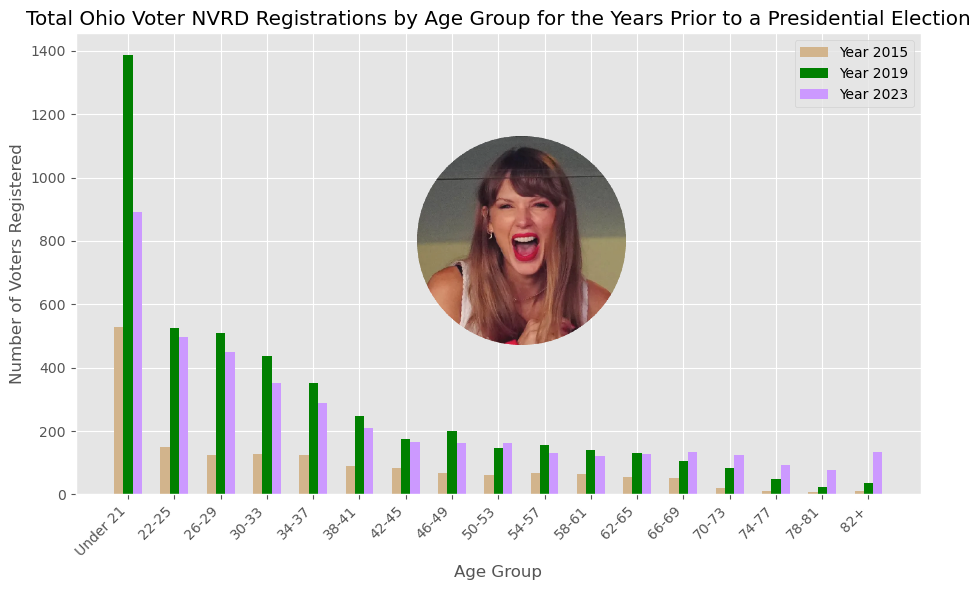

In [8]:
# Define age bins 
age_bins = [0, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 115]  

# Define labels for the bins
labels = ['Under 21', '22-25', '26-29', '30-33', '34-37', '38-41', '42-45', '46-49', '50-53', '54-57', '58-61',
          '62-65', '66-69', '70-73', '74-77', '78-81', '82+']

# Create new column and apply the cut function with the updated age bins and labels
df['Age On Voter Reg Day Bin'] = pd.cut(df['Age On Voter Reg Day'], bins=age_bins, labels=labels, right=False)

# Define NVRD for years before presidential election values
voter_reg_dates = ['2023-09-19','2019-09-24','2015-09-22']

# Create a filtered df for only NVRD dates
nvrd_df = df[df['REGISTRATION_DATE'].isin(voter_reg_dates)]

# Get total registrations by year by Age bin on NVRD
total_nvrd_by_age_by_year = nvrd_df.groupby(['Reg Year', 'Age On Voter Reg Day Bin'])['COUNTY_NUMBER'].size().reset_index(name='Voters Registered')
total_nvrd_by_age_by_year

# Pivot the data to prepare it for the grouped bar chart
pivot_data = total_nvrd_by_age_by_year.pivot(index='Age On Voter Reg Day Bin', columns='Reg Year', values='Voters Registered')

# Define colors for each year
colors = ['tan', 'green', '#CC99FF']

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2  # Width of each bar
x = np.arange(len(labels))  # x-axis values for the bars

for i, year in enumerate(pivot_data.columns):  # Iterate through the columns of pivot_data
    ax.bar(x + (i - 1) * width, pivot_data[year], width=width, label=f'Year {year}', color=colors[i])

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Voters Registered')
ax.set_title('Total Ohio Voter NVRD Registrations by Age Group for the Years Prior to a Presidential Election')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Load and display the photo (replace 'your_image.png' with the path to your image file)
image_path = '/Users/mattmcbride/Desktop/T-Swiz 3.png'
img = plt.imread(image_path)

# Center the photo within the lavender bar
for i, bar in enumerate(bars):
    if total_nvrd_by_year['Reg Year'][i] == 2023:
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (8.5, 800), frameon=False, pad=0)
        ax.add_artist(ab)  # Add the image annotation to the axis 'ax'


plt.tight_layout()
plt.show()

# 'Closure' Conclusion

The analysis reveals that, despite Taylor Swift's Instagram post, overall voter registrations on National Voter Registration Day in the State of Ohio were actually lower this year, marking the lowest level since 2017. In comparison to previous National Voter Registration Days in the year preceding a Presidential elections, the 2023 totals ranked 2nd out of 3 years since NVRD's inception in 2012. Notably, the 2023 NVRD did record the highest registration totals among certain older age groups. Specifically, the age groups of 50-53, 66-69, 70-73, 74-77, 78-81, and 82+ all experienced record registrations.

This research raises additional questions and avenues for further analysis, such as:

* Is the under-21 age group significantly lagging behind in voter registrations outside of NVRD, or have they already registered in large numbers?
* What are the demographic trends in Ohio, and how might these trends impact local, state, and federal elections in the future?
* Why does the State of Alabama charge $37,000 for election data when it is freely available in other states?